# Hajbi et al.

## Execute multiple modules

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PHREEQC\ROSS\rosspy\..\databases\pitzer.json


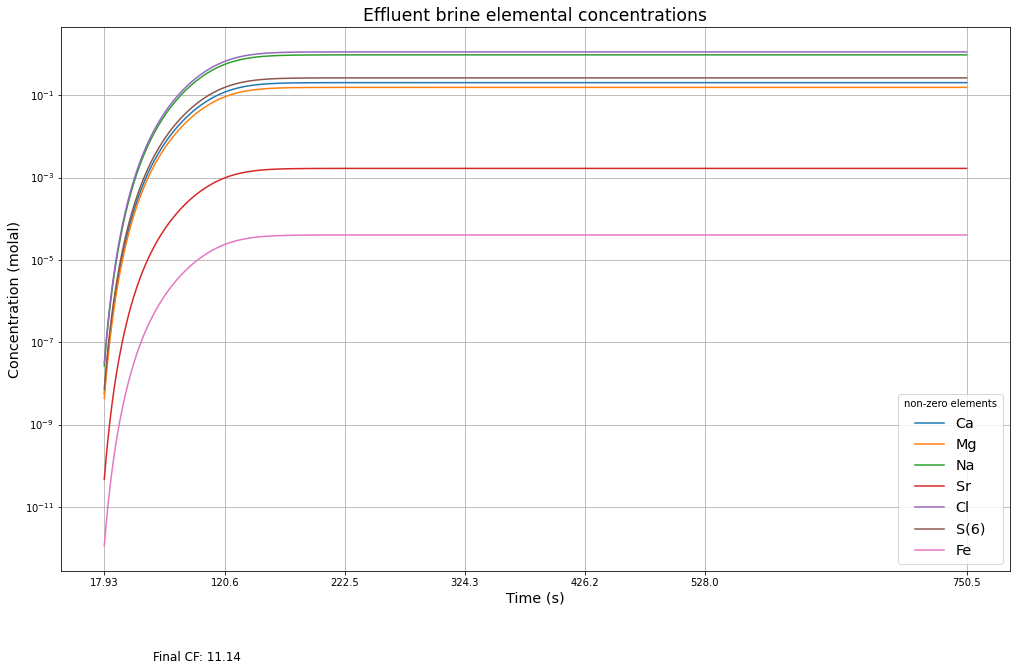




 Molal concentrations of feed elements over 733 seconds 
             Ca(mol/kgw)   Mg(mol/kgw)   Na(mol/kgw)   Sr(mol/kgw)  \
time (sec)                                                           
17.93       5.612173e-09  4.306014e-09  2.649877e-08  4.635178e-11   
18.74       1.072278e-08  8.227194e-09  5.062931e-08  8.856103e-11   
19.56       1.960381e-08  1.504128e-08  9.256251e-08  1.619108e-10   
20.37       3.447404e-08  2.645067e-08  1.627747e-07  2.847263e-10   
21.19       5.856475e-08  4.493458e-08  2.765228e-07  4.836950e-10   
...                  ...           ...           ...           ...   
747.3       2.019320e-01  1.549350e-01  9.534539e-01  1.667786e-03   
748.1       2.019320e-01  1.549350e-01  9.534539e-01  1.667786e-03   
748.9       2.019320e-01  1.549350e-01  9.534539e-01  1.667786e-03   
749.7       2.019320e-01  1.549350e-01  9.534539e-01  1.667786e-03   
750.5       2.019320e-01  1.549350e-01  9.534539e-01  1.667786e-03   

             Cl(mol/kgw)  S(6

In [37]:
from scipy.constants import nano, milli, day, hour

# run the ROSS model
%run ../rosspy/core.py
ross = ROSSPkg()

# module parameters
quantity_of_modules = 5
module_characteristics = {        
    'permeate_flow_m3_per_day': 1200 / quantity_of_modules,
    'max_feed_flow_m3_per_hour': 1848 / (day/hour),
}

# water parameters
custom_water_parameters = {
    'element': {
        'Ca': {
            'concentration (ppm)':720,
            'reference': ''
        },
        'Mg': {
            'concentration (ppm)':335,
            'reference':''
        },
        'Na': {
            'concentration (ppm)':1950,
            'reference':''
        },
        'Sr': {
            'concentration (ppm)':13,
            'reference':''
        },
        'Cl': {
            'concentration (ppm)':3550,
            'reference':''
        },
        'S(6)': {
            'concentration (ppm)':2250,
            'reference':''
        },
        'Fe': {
            'concentration (ppm)':0.2,
            'reference':''
        }
    }
}

# general parameters
operating_system = 'windows'
phreeqc_path = 'C:\\Program Files\\USGS\\phreeqc-3.6.2-15100-x64'
database_selection = 'pitzer'
simulation_type = 'transport'
simulation_title = 'test'
graphical_selection = output_perspective = 'brine'
simulation_time = 750


# create the input file
ross.define_general(operating_system, phreeqc_path, database_selection, simulation_type, simulation_title)
ross.transport(simulation_time, module_characteristics, output_perspective, )
ross.reaction(quantity_of_modules)
ross.solutions(custom_water_parameters = custom_water_parameters)
ross.equilibrium_phases()
ross.selected_output()
ross.export(print_block = False)

# execute the input file
data_csv = ross.execute(print_output = False)

# process the simulation results
multi_module_data = ross.process_selected_output(graphical_selection)

## Process the results

In [39]:
from chempy.properties.water_density_tanaka_2001 import water_density
from scipy.constants import milli
from chemicals import periodic_table

display(multi_module_data)

# final effluent concentrations
last_row = multi_module_data.iloc[-1]
print(last_row)

# feed concentrations
water_density = water_density() * milli
custom_water_parameters = {
    'Ca': {
        'concentration (ppm)':720,
        'reference': ''
    },
    'Mg': {
        'concentration (ppm)':335,
        'reference':''
    },
    'Na': {
        'concentration (ppm)':1950,
        'reference':''
    },
    'Sr': {
        'concentration (ppm)':13,
        'reference':''
    },
    'Cl': {
        'concentration (ppm)':3550,
        'reference':''
    },
    'S(6)': {
        'concentration (ppm)':2250,
        'reference':''
    },
    'Fe': {
        'concentration (ppm)':0.2,
        'reference':''
    }
}

elemental_masses = {}
for element in periodic_table:
    elemental_masses[element.symbol] = element.MW

molals = {}
for element in custom_water_parameters:
    original_element = element
    element = re.sub('((?:\(\d\)))', '', element)
    mass = elemental_masses[element] 
    ppm_conc = custom_water_parameters[original_element]['concentration (ppm)'] * milli
    molal_conc = ppm_conc / water_density / mass
    molals[original_element] = molal_conc
    
# final effluent CF for each element
cfs = {}
for element, final_conc in last_row.iteritems():
    element = re.search('([A-Z][a-z]?(?:\(\d\))?(?=\(mol\/kgw\)))', element).group()
    initial_conc = molals[element]
#     print('element', element)
#     print('initial_conc', initial_conc)
#     print('final_conc', final_conc)
    cfs[element] = final_conc / initial_conc
    
print(cfs)

,Ca(mol/kgw),Mg(mol/kgw),Na(mol/kgw),Sr(mol/kgw),Cl(mol/kgw),S(6)(mol/kgw),Fe(mol/kgw)
time (sec),,,,,,,
17.93,5.612173e-09,4.306014e-09,2.649877e-08,4.635178e-11,3.128251e-08,7.317254e-09,1.118810e-12
18.74,1.072278e-08,8.227194e-09,5.062931e-08,8.856103e-11,5.976927e-08,1.398056e-08,2.137631e-12
19.56,1.960381e-08,1.504128e-08,9.256251e-08,1.619108e-10,1.092725e-07,2.555981e-08,3.908102e-12
20.37,3.447404e-08,2.645067e-08,1.627747e-07,2.847263e-10,1.921599e-07,4.494789e-08,6.872545e-12
21.19,5.856475e-08,4.493458e-08,2.765228e-07,4.836950e-10,3.264426e-07,7.635779e-08,1.167513e-11
...,...,...,...,...,...,...,...
747.3,2.019320e-01,1.549350e-01,9.534539e-01,1.667786e-03,1.125578e+00,2.632826e-01,4.025598e-05
748.1,2.019320e-01,1.549350e-01,9.534539e-01,1.667786e-03,1.125578e+00,2.632826e-01,4.025598e-05
748.9,2.019320e-01,1.549350e-01,9.534539e-01,1.667786e-03,1.125578e+00,2.632826e-01,4.025598e-05


Ca(mol/kgw)      0.201932
Mg(mol/kgw)      0.154935
Na(mol/kgw)      0.953454
Sr(mol/kgw)      0.001668
Cl(mol/kgw)      1.125578
S(6)(mol/kgw)    0.263283
Fe(mol/kgw)      0.000040
Name: 750.5, dtype: float64
{'Ca': 11.207125598441834, 'Mg': 11.207684864335643, 'Na': 11.207670239208609, 'Sr': 11.207684864445394, 'Cl': 11.207684864441111, 'S(6)': 3.74098949842743, 'Fe': 11.207283493365}


## Execute a single module

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PHREEQC\ROSS\rosspy\..\databases\pitzer.json
--> ERROR: Inconsistent REACTION calculations.


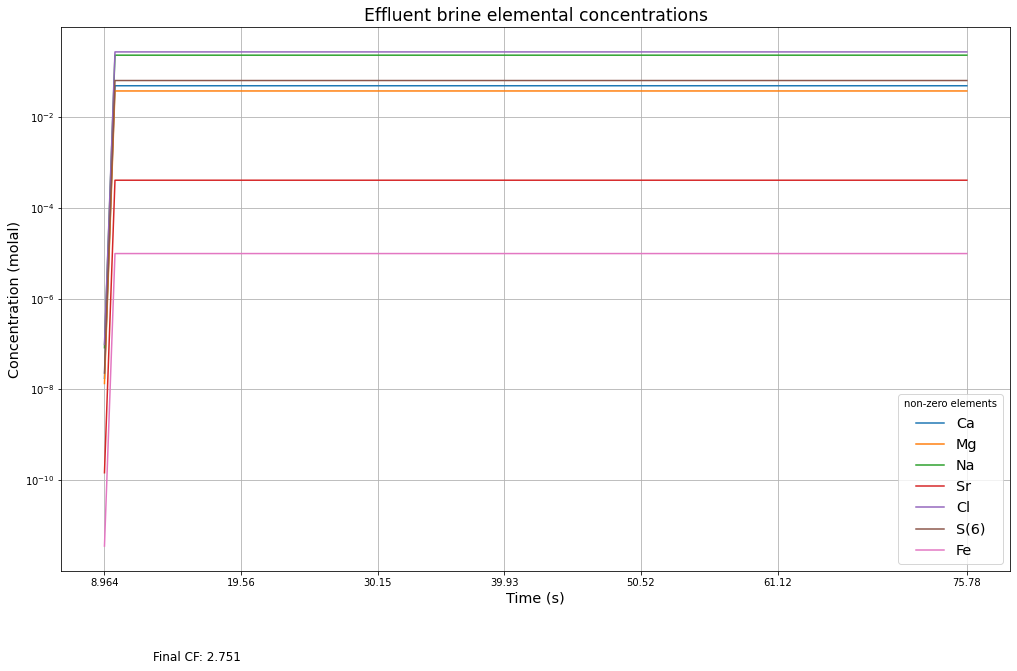




 Molal concentrations of feed elements over 66.8 seconds 
             Ca(mol/kgw)   Mg(mol/kgw)   Na(mol/kgw)   Sr(mol/kgw)  \
time (sec)                                                           
8.964       1.767037e-08  1.355782e-08  8.343346e-08  1.459422e-10   
9.779       4.986274e-02  3.825785e-02  2.354349e-01  4.118238e-04   
10.59       4.986276e-02  3.825787e-02  2.354350e-01  4.118240e-04   
11.41       4.986276e-02  3.825787e-02  2.354350e-01  4.118240e-04   
12.22       4.986276e-02  3.825787e-02  2.354350e-01  4.118240e-04   
...                  ...           ...           ...           ...   
72.53       4.986276e-02  3.825787e-02  2.354350e-01  4.118240e-04   
73.34       4.986276e-02  3.825787e-02  2.354350e-01  4.118240e-04   
74.16       4.986276e-02  3.825787e-02  2.354350e-01  4.118240e-04   
74.97       4.986276e-02  3.825787e-02  2.354350e-01  4.118240e-04   
75.78       4.986276e-02  3.825787e-02  2.354350e-01  4.118240e-04   

             Cl(mol/kgw)  S(

In [13]:
from scipy.constants import nano, milli, day, hour

# run the ROSS model
%run ../rosspy/core.py
ross = ROSSPkg()

# module parameters
quantity_of_modules = 1
module_characteristics = {        
    'permeate_flow_m3_per_day': 1200 / quantity_of_modules,
    'max_feed_flow_m3_per_hour': 1848 / (day/hour),
}

# water parameters
custom_water_parameters = {
    'element': {
        'Ca': {
            'concentration (ppm)':720,
            'reference': ''
        },
        'Mg': {
            'concentration (ppm)':335,
            'reference':''
        },
        'Na': {
            'concentration (ppm)':1950,
            'reference':''
        },
        'Sr': {
            'concentration (ppm)':13,
            'reference':''
        },
        'Cl': {
            'concentration (ppm)':3550,
            'reference':''
        },
        'S(6)': {
            'concentration (ppm)':2250,
            'reference':''
        },
        'Fe': {
            'concentration (ppm)':0.2,
            'reference':''
        }
    }
}

# general parameters
operating_system = 'windows'
phreeqc_path = 'C:\\Program Files\\USGS\\phreeqc-3.6.2-15100-x64'
database_selection = 'pitzer'
simulation_type = 'transport'
simulation_title = 'test'
graphical_selection = output_perspective = 'brine'
simulation_time = 75


# create the input file
ross.define_general(operating_system, phreeqc_path, database_selection, simulation_type, simulation_title)
ross.transport(simulation_time, module_characteristics, output_perspective, )
ross.reaction(quantity_of_modules)
ross.solutions(custom_water_parameters = custom_water_parameters)
ross.equilibrium_phases()
ross.selected_output()
ross.export(print_block = False)

# execute the input file
data_csv = ross.execute(print_output = False)

# process the simulation results
single_module_data = ross.process_selected_output(graphical_selection)

## Process the results

In [36]:
from chempy.properties.water_density_tanaka_2001 import water_density
from scipy.constants import milli
from chemicals import periodic_table

display(single_module_data)

# final effluent concentrations
last_row = single_module_data.iloc[-1]

# feed concentrations
water_density = water_density() * milli
custom_water_parameters = {
    'Ca': {
        'concentration (ppm)':720,
        'reference': ''
    },
    'Mg': {
        'concentration (ppm)':335,
        'reference':''
    },
    'Na': {
        'concentration (ppm)':1950,
        'reference':''
    },
    'Sr': {
        'concentration (ppm)':13,
        'reference':''
    },
    'Cl': {
        'concentration (ppm)':3550,
        'reference':''
    },
    'S(6)': {
        'concentration (ppm)':2250,
        'reference':''
    },
    'Fe': {
        'concentration (ppm)':0.2,
        'reference':''
    }
}

elemental_masses = {}
for element in periodic_table:
    elemental_masses[element.symbol] = element.MW

molals = {}
for element in custom_water_parameters:
    original_element = element
    element = re.sub('((?:\(\d\)))', '', element)
    mass = elemental_masses[element] 
    ppm_conc = custom_water_parameters[original_element]['concentration (ppm)'] * milli
    molal_conc = ppm_conc / water_density / mass
    molals[original_element] = molal_conc
    
# final effluent CF for each element
cfs = {}
for element, final_conc in last_row.iteritems():
    print('element', element)
    element = re.search('([A-Z][a-z]?(?:\(\d\))?(?=\(mol\/kgw\)))', element).group()
    initial_conc = molals[element]
    print('initial_conc', initial_conc)
    print('final_conc', final_conc)
    cfs[element] = final_conc / initial_conc
    
print(cfs)

,Ca(mol/kgw),Mg(mol/kgw),Na(mol/kgw),Sr(mol/kgw),Cl(mol/kgw),S(6)(mol/kgw),Fe(mol/kgw)
time (sec),,,,,,,
8.964,1.767037e-08,1.355782e-08,8.343346e-08,1.459422e-10,9.849546e-08,2.303895e-08,3.522662e-12
9.779,4.986274e-02,3.825785e-02,2.354349e-01,4.118238e-04,2.779372e-01,6.501195e-02,9.940346e-06
10.59,4.986276e-02,3.825787e-02,2.354350e-01,4.118240e-04,2.779374e-01,6.501198e-02,9.940351e-06
11.41,4.986276e-02,3.825787e-02,2.354350e-01,4.118240e-04,2.779374e-01,6.501198e-02,9.940351e-06
12.22,4.986276e-02,3.825787e-02,2.354350e-01,4.118240e-04,2.779374e-01,6.501198e-02,9.940351e-06
...,...,...,...,...,...,...,...
72.53,4.986276e-02,3.825787e-02,2.354350e-01,4.118240e-04,2.779374e-01,6.501198e-02,9.940351e-06
73.34,4.986276e-02,3.825787e-02,2.354350e-01,4.118240e-04,2.779374e-01,6.501198e-02,9.940351e-06
74.16,4.986276e-02,3.825787e-02,2.354350e-01,4.118240e-04,2.779374e-01,6.501198e-02,9.940351e-06


element Ca(mol/kgw)
initial_conc 0.018018175593833865
final_conc 0.049862762412184784
element Mg(mol/kgw)
initial_conc 0.013823994141902711
final_conc 0.03825786522879085
element Na(mol/kgw)
initial_conc 0.08507154974841126
final_conc 0.23543496941517295
element Sr(mol/kgw)
initial_conc 0.0001488073774830353
final_conc 0.00041182400212029437
element Cl(mol/kgw)
initial_conc 0.10042913494024724
final_conc 0.27793735082294774
element S(6)(mol/kgw)
initial_conc 0.07037779134664683
final_conc 0.06501198151387176
element Fe(mol/kgw)
initial_conc 3.591948157348583e-06
final_conc 9.940350508675506e-06
{'Ca': 2.76735911205398, 'Mg': 2.7674972107247364, 'Na': 2.7674935993459995, 'Sr': 2.7674972107296503, 'Cl': 2.767497210727876, 'S(6)': 0.9237570584398465, 'Fe': 2.767398100760183}
